# Phase 1:Creating Database.

importing packages

In [1]:
import os
import re
import csv
import sqlite3
from sqlite3 import Error
import pandas as pd
#from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

Connecting to SQLite

In [2]:
def create_connection(db_file, delete_db=False):
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

Creating new table

In [3]:
#not used
def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

selecting from table

In [4]:
def select(conn,selct_sql):
    cur = conn.cursor()
    try:
        cur.execute(selct_sql)
        names = list(map(lambda x: x[0], cur.description))
        rows = cur.fetchall()
    except Error as e:
        names = "NA"
        rows = []
    return [names,rows]

deleting from table

In [5]:
def delete(conn,delete_sql):
    cur = conn.cursor()
    try:
        cur.execute(delete_sql)
        print("deleted")
    except Error as e:
        print("not deleted")

Converting csv file to SQLite file

In [6]:
def save_as_sql(file,conn,table_name,index=False):
    read_csv = pd.read_csv(file)
    read_csv.to_sql(table_name, conn, index)

Saving tables

In [7]:
conn = create_connection('weather_data',True)
save_as_sql('humidity.csv',conn,'humidity',False)
save_as_sql('city_attributes.csv',conn,'cities',False)
save_as_sql('pressure.csv',conn,'pressure',False)
save_as_sql('temperature.csv',conn,'temperature',False)
save_as_sql('weather_description.csv',conn,'weather_description',False)
save_as_sql('wind_direction.csv',conn,'wind_direction',False)
save_as_sql('wind_speed.csv',conn,'wind_speed',False)
save_as_sql('USA_Historical_Tornado.csv',conn,'USA_Historical_Tornado',False)
save_as_sql('USA_CityCoordinates.csv',conn,'USA_City_Coordinates',False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


selcting cities of USA

In [8]:
[names,city_name] = select(conn,"Select city from cities WHERE Country = 'United States'")

Selecting humidity for city

In [9]:
print([names,city_name])

[['City'], [('Portland',), ('San Francisco',), ('Seattle',), ('Los Angeles',), ('San Diego',), ('Las Vegas',), ('Phoenix',), ('Albuquerque',), ('Denver',), ('San Antonio',), ('Dallas',), ('Houston',), ('Kansas City',), ('Minneapolis',), ('Saint Louis',), ('Chicago',), ('Nashville',), ('Indianapolis',), ('Atlanta',), ('Detroit',), ('Jacksonville',), ('Charlotte',), ('Miami',), ('Pittsburgh',), ('Philadelphia',), ('New York',), ('Boston',)]]


In [10]:
for city in city_name:  
    string = "Select datetime,\""+city[0]+"\" from humidity"
    [names,city_humdity_list] = select(conn,string)
    city_humdity = pd.DataFrame(city_humdity_list)
    #city_humdity.plot(0,1)
    break

Setting value of index as datetime

In [11]:
#print(city_humdity)
city_humdity = city_humdity.set_index([0])
#print(city_humdity)
city_humdity.index = pd.to_datetime(city_humdity.index)

plotting

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


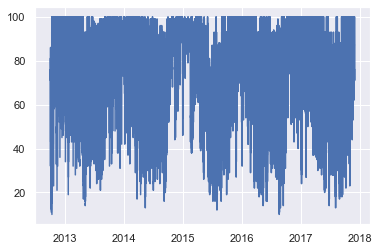

In [12]:
sns.set()
fig = plt.figure()
plt.plot(city_humdity)

In [13]:
for city in city_name:  
    string = "Select datetime,\""+city[0]+"\" from wind_speed WHERE datetime LIKE '2016%'"
    [names,wind_speed_list] = select(conn,string)
    wind_speed = pd.DataFrame(wind_speed_list)
    break
    #city_humdity.plot(0,1)
#print(wind_speed)
wind_speed = wind_speed.set_index([0])
#print(wind_speed)
wind_speed.index = pd.to_datetime(wind_speed.index)

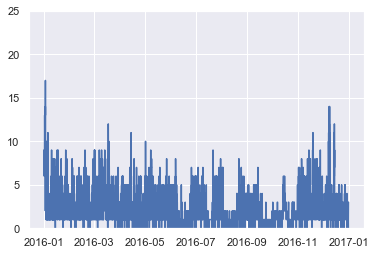

In [14]:
#sns.set()
fig = plt.figure()
#axis = plt.gca()
plt.ylim((0.0,25.0))
plt.plot(wind_speed)

In [15]:
for city in city_name:  
    string = "Select datetime,\""+city[0]+"\" from temperature"
    [names,temperature_list] = select(conn,string)
    temperature = pd.DataFrame(temperature_list)
    break
    #city_humdity.plot(0,1)
#print(wind_speed)
temperature = temperature.set_index([0])
#print(wind_speed)
temperature.index = pd.to_datetime(temperature.index)

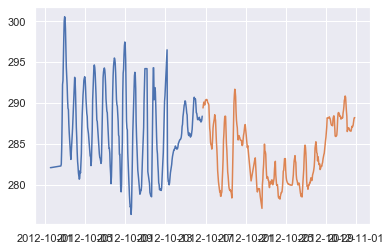

In [16]:
#sns.set()
fig = plt.figure()
#axis = plt.gca()
plt.plot(temperature[1:365])
plt.plot(temperature[366:730])

In [38]:
Tor_df = pd.read_sql_query("SELECT st,len,\"start lat\",\"start lon\",\"fin lat\",\"fin lon\" from USA_Historical_Tornado WHERE Yr = 2015", conn)

City_at_df = pd.read_sql_query("Select City,Latitude,Longitude from cities WHERE country = 'United States'", conn)

In [45]:
import plotly.graph_objects as go

import pandas as pd

fig1 = go.Figure(data=go.Scattergeo(
        text = City_at_df['City'],   
        lon = City_at_df['Longitude'],
        lat = City_at_df['Latitude'],
        mode = 'markers',
        marker_color = 'purple',
        ))

fig1.update_layout(
        title = 'Cities in USA',
        geo_scope='usa',
    )
fig1.show()

fig2 = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = Tor_df['start lon'],
        lat = Tor_df['start lat'],
        text = Tor_df['st'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=0.1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'sunsetdark',
            cmin = 0,
            color = Tor_df['len'],
            cmax = Tor_df['len'].max(),
            colorbar_title="Length of Tornadoes"
        )))

fig2.update_layout(
        title = 'Tornadoes in the year 2015',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )


fig2.show()

In [80]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = Tor_df['start lon'],
        lat = Tor_df['start lat'],
        text = Tor_df['st'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=0.1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'cividis',
            cmin = 0,
            color = Tor_df['len'],
            cmax = Tor_df['len'].max(),
            colorbar_title="Length of Tornadoes"
        )))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    text = City_at_df['City'],   
    lon = City_at_df['Longitude'],
    lat = City_at_df['Latitude'],
    mode = 'markers',
    marker_color = 'purple',
    hoverinfo = 'text',
    ))


fig.update_layout(
    title_text = 'Tornadoes in the year 2015<br>And Cities in USA',
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'usa',
        projection_type = 'albers usa',
        showland = True,
        landcolor = 'rgb(243, 243, 242)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()